## 1. Data set & Libraries import

#### * Data set link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 

In [1]:
#Basic_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from collections import Counter
import itertools
from imblearn.over_sampling import SMOTE #--> Synthetic Minority Oversampling Technique
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 2. Display top 5 rows of dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Display Last 5 Rows of Dataset

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#### (*)To view all coloumns of large dataset

In [6]:
pd.options.display.max_columns = None

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 4. Detail Information About our dataset

In [8]:
data.shape

(284807, 31)

In [9]:
print("Number of Coloumns: ",data.shape[1])
print("Number of Rows: ",data.shape[0])

Number of Coloumns:  31
Number of Rows:  284807


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 5. Check Null Values In Dataset

In [11]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### (*)Feature Scaling / Preprocessing

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
data = data.drop(['Time'],axis=1)

In [18]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [19]:
data.shape

(284807, 30)

In [20]:
data.duplicated().any()

True

In [21]:
data = data.drop_duplicates()

In [22]:
data.shape

(275663, 30)

In [23]:
# duplicate_data_removed

284807-275663

9144

In [24]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,-0.013574,0.005134,0.000702,0.012432,-0.010208,0.002550,0.011589,0.007588,-0.000638,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.008682
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


In [25]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

Text(0, 0.5, 'Count')

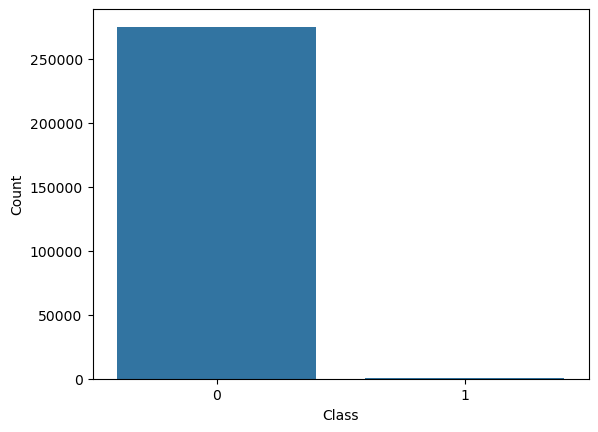

In [26]:
sns.countplot(x='Class', data=data)
plt.xlabel('Class')
plt.ylabel('Count')

### 6. Splitting the dataset into train and test model

In [27]:
X= data.drop('Class',axis=1)
y=data['Class']

In [28]:
#Extra needed modules import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

## 7. Logistic_Regression (imbalance dataset)

In [29]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred1)

0.9992563437505668

In [32]:
precision_score(y_test,y_pred1)

0.890625

In [33]:
recall_score(y_test,y_pred1)

0.6263736263736264

In [34]:
f1_score(y_test,y_pred1)

0.7354838709677419

#### (*) Handling Imbalance Dataset

In [35]:
#Techniques used to balance datasets
#Undersampling
#Oversampling

#### 8. Undersampling

In [36]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [37]:
normal.shape

(275190, 30)

In [38]:
fraud.shape

(473, 30)

In [39]:
normal.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [40]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [41]:
normal_sample=normal.sample(n=473) #to match with fraudulent transactions

In [42]:
normal_sample.shape

(473, 30)

In [43]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [44]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [45]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.362673,1.122278,1.192190,-0.136939,0.310966,-0.453603,0.653860,0.052777,-0.744189,-0.364424,1.319712,0.893496,0.828406,-0.399039,0.136516,0.640061,-0.403666,0.373517,0.316878,0.184720,-0.224596,-0.576847,-0.074686,-0.027936,-0.121626,0.072267,0.245915,0.086454,-0.337397,0
1,0.027836,0.536973,-1.190175,-1.727904,2.923662,3.406494,0.348058,0.924384,-0.166887,-0.389694,-0.199631,0.031254,-0.374126,0.354350,0.041428,-0.154104,-0.482703,-0.841245,-0.207145,0.029399,-0.264305,-0.716545,0.115739,0.688150,-0.458957,0.161842,0.264299,0.090468,-0.333799,0
2,-1.374912,0.798765,-1.707117,-2.674925,1.445206,2.975923,-0.739841,1.662762,-1.174421,0.497711,-1.043802,-0.097784,0.131130,0.494880,-0.622674,-1.129866,-0.156264,1.181908,-0.745592,-0.282252,-0.386375,-0.684116,0.087914,1.028632,-0.292719,0.865962,0.321586,0.205222,-0.273268,0
3,1.973479,-0.550889,-0.384079,0.024784,-0.629650,0.022365,-0.843741,0.201956,1.337535,-0.026681,0.654384,0.810247,-0.564103,0.084658,-0.090114,0.334246,-0.682699,0.710129,0.168748,-0.223488,0.215743,0.793523,0.178631,0.789746,-0.203469,0.072233,0.005058,-0.047329,-0.353029,0
4,2.064608,-0.159520,-0.578977,0.291234,-0.077760,-0.106841,-0.555325,-0.105973,2.646722,-0.609736,-0.621908,-2.211095,2.127093,1.407085,0.427132,0.428567,-0.261648,0.510868,-0.028728,-0.245927,-0.328983,-0.538499,0.239041,-1.177418,-0.258347,-0.895434,0.035736,-0.043850,-0.344753,0


#### Training and Testing after undersampling

In [46]:
X= new_data.drop('Class',axis=1)
y= new_data['Class']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### 9. Logistic Regression After Undersampling

In [48]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred1 = log.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred1)

0.9368421052631579

In [51]:
precision_score(y_test,y_pred1)

0.96875

In [52]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [53]:
f1_score(y_test,y_pred1)

0.9393939393939394

### 10. Decision Tree Classifier after Undersampling

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred2 = dt.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred2)

0.9263157894736842

In [57]:
precision_score(y_test,y_pred2)

0.9489795918367347

In [58]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [59]:
f1_score(y_test,y_pred2)

0.93

### 11. Random Forrest Classifier After Undersampling

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred3 = rf.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred3)

0.9421052631578948

In [63]:
precision_score(y_test,y_pred3)

0.9789473684210527

In [64]:
recall_score(y_test,y_pred3)

0.9117647058823529

In [65]:
f1_score(y_test,y_pred3)

0.9441624365482234

### 12. Xgboost Classifier After Undersampling

In [66]:
xb = XGBClassifier()
xb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [67]:
y_pred4 = xb.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred4)

0.9315789473684211

In [69]:
precision_score(y_test,y_pred4)

0.968421052631579

In [70]:
recall_score(y_test,y_pred4)

0.9019607843137255

In [71]:
f1_score(y_test,y_pred4)

0.934010152284264

#### (*)Plotting

In [72]:
final_data = pd.DataFrame({'Models':['LR','DT','RFC','XB'],
                           "ACC":[accuracy_score(y_test,y_pred1)*100,
                                  accuracy_score(y_test,y_pred2)*100,
                                  accuracy_score(y_test,y_pred3)*100,
                                  accuracy_score(y_test,y_pred4)*100
                                 ]})

In [73]:
final_data

,Models,ACC
0,LR,93.684211
1,DT,92.631579
2,RFC,94.210526
3,XB,93.157895


C:\Users\subhb\AppData\Local\Temp\ipykernel_15944\1583318235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


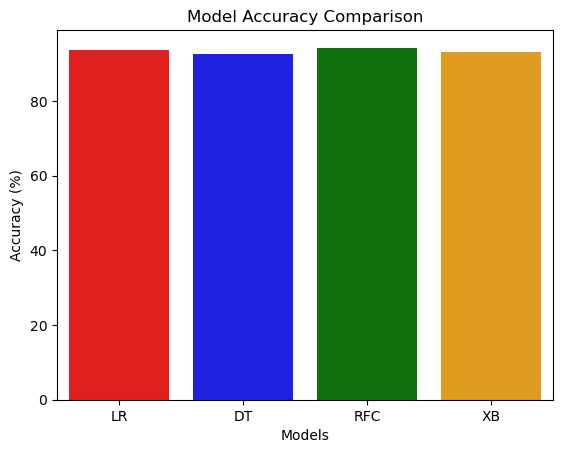

In [139]:
# Plotting a bar plot with different colors for each bar
sns.barplot(
    x=final_data['Models'],
    y=final_data['ACC'],
    palette=['red','blue', 'green', 'orange']  # Assign specific colors to each bar
)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

### 13. Confusion Matrix & Roc Curve (After Undersampling)

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve #---> (Receiver Operating Characteristic curve)
from sklearn.metrics import roc_auc_score

#### 13a) Logistic Regression 

Confusion Matrix for Logistic Regression
[[53671  1402]
 [ 4583 50420]]
AUC for Normal Logistic Regression: 0.989


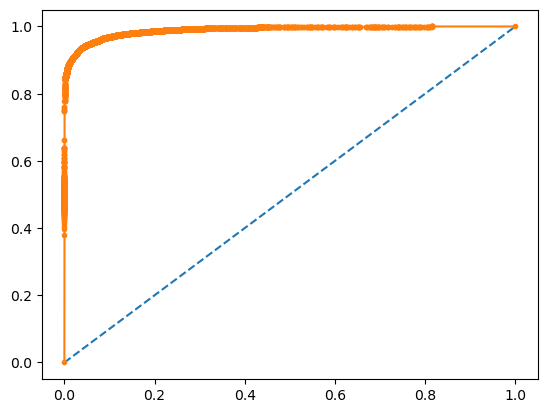

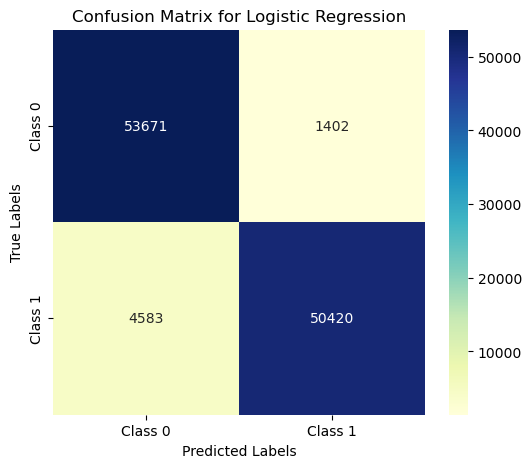

In [131]:
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for Logistic Regression')
print(cm1)
probs = log.predict_proba(X_test)
probs = probs[:,1]
auc1 = roc_auc_score(y_test,probs)
print('AUC for Normal Logistic Regression: %.3f' % auc1)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 13b) Decision Tree Classifier

Confusion Matrix for Decision Tree
[[54942   131]
 [   54 54949]]
AUC for Normal Decison Tree: 0.998


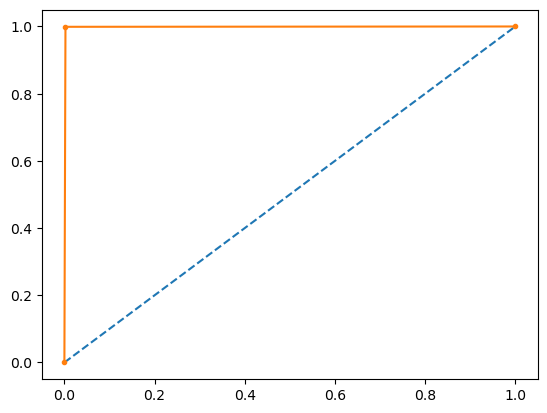

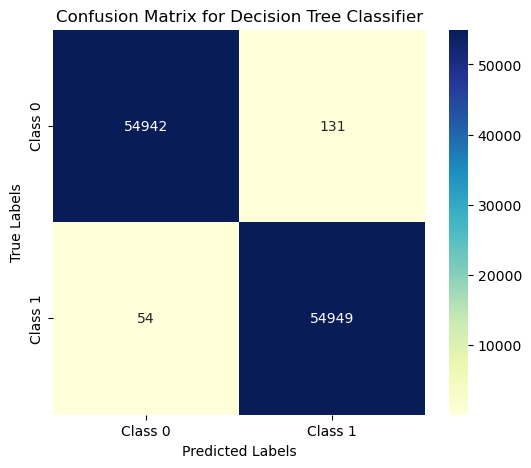

In [132]:
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix for Decision Tree')
print(cm2)
probs = dt.predict_proba(X_test)
probs = probs[:,1]
auc2 = roc_auc_score(y_test,probs)
print('AUC for Normal Decison Tree: %.3f' % auc2)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 13c) Random Forrest Classifier

Confusion Matrix for Random Forrest
[[55064     9]
 [    0 55003]]
AUC for Normal Random Forrest: 1.000


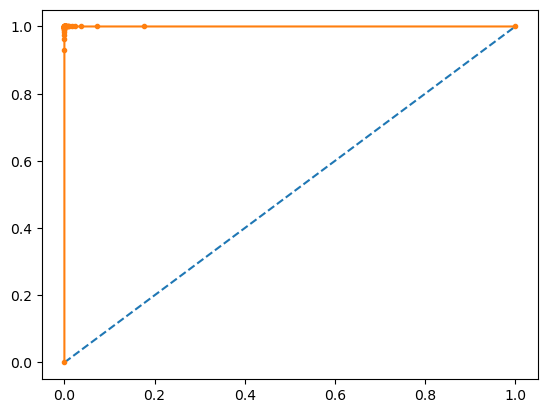

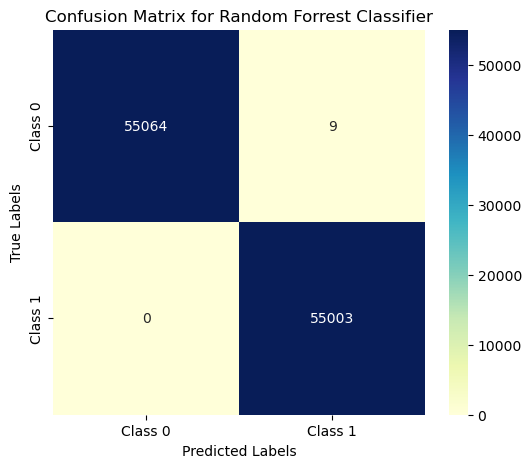

In [133]:
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix for Random Forrest')
print(cm3)
probs = rf.predict_proba(X_test)
probs = probs[:,1]
auc3 = roc_auc_score(y_test,probs)
print('AUC for Normal Random Forrest: %.3f' % auc3)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Random Forrest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 13d) Xgboost Classifer

Confusion Matrix for XGBoost
[[55038    35]
 [    0 55003]]
AUC for XGBoost: 1.000


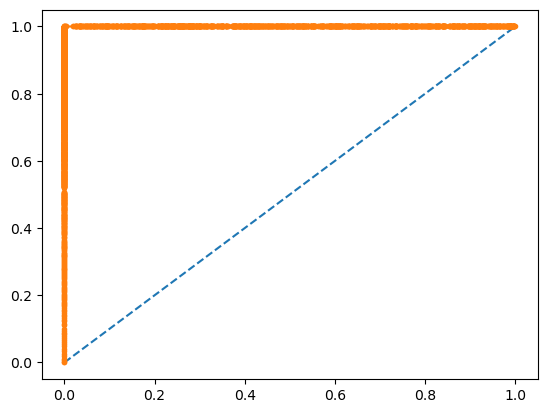

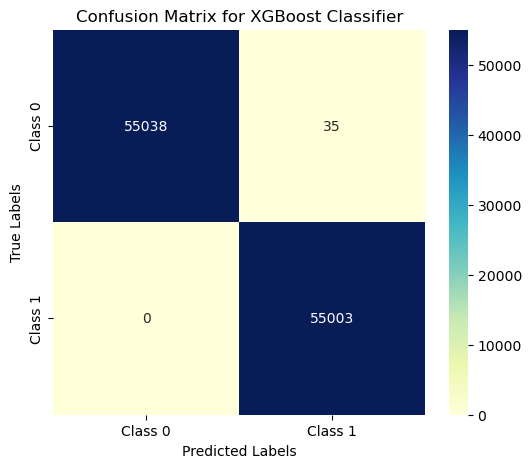

In [134]:
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion Matrix for XGBoost')
print(cm4)
probs = xb.predict_proba(X_test)
probs = probs[:,1]
auc4 = roc_auc_score(y_test,probs)
print('AUC for XGBoost: %.3f' % auc4)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm4, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 14 Oversampling

In [82]:
import pandas as pd

In [83]:
data = pd.read_csv('creditcard.csv')

In [84]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [85]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [86]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [87]:
data = data.drop(['Time'],axis=1)

In [88]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [90]:
data.shape

(284807, 30)

In [91]:
data.duplicated().any()

True

In [92]:
data = data.drop_duplicates()

In [93]:
data.shape

(275663, 30)

In [94]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [95]:
X= data.drop('Class',axis=1)
y=data['Class']

In [96]:
X.shape

(275663, 29)

In [97]:
y.shape

(275663,)

In [98]:
X_res,y_res = SMOTE().fit_resample(X,y)

D:\Software Install\Anaconda\envs\New\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [99]:
y_res.shape

(550380,)

In [100]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42) #--> Training model after Oversampling

### 15. Logistic Regression After Oversampling

In [102]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [140]:
y_predic1 = log.predict(X_test)

In [141]:
accuracy_score(y_test,y_predic1)

0.9456284748719067

In [142]:
precision_score(y_test,y_predic1)

0.9729458531125776

In [143]:
recall_score(y_test,y_predic1)

0.9166772721487919

In [144]:
f1_score(y_test,y_predic1)

0.943973788907091

### 16. DecisionTree Classifier After Oversampling

In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [145]:
y_predic2 = dt.predict(X_test)

In [146]:
accuracy_score(y_test,y_predic2)

0.9983193429993823

In [147]:
precision_score(y_test,y_predic2)

0.9976216412490923

In [148]:
recall_score(y_test,y_predic2)

0.9990182353689798

In [149]:
f1_score(y_test,y_predic2)

0.9983194498696438

### 17. RandomForrest Classifier After Oversampling

In [114]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [150]:
y_predic3 = rf.predict(X_test)

In [151]:
accuracy_score(y_test,y_predic3)

0.999918238308078

In [152]:
precision_score(y_test,y_predic3)

0.9998363993310551

In [153]:
recall_score(y_test,y_predic3)

1.0

In [154]:
f1_score(y_test,y_predic3)

0.9999181929736854

### 18. XGBoost After Oversampling

In [120]:
xb = XGBClassifier()
xb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [155]:
y_predic4 = xb.predict(X_test)

In [156]:
accuracy_score(y_test,y_predic4)

0.999682037864748

In [157]:
precision_score(y_test,y_predic4)

0.999364075729496

In [158]:
recall_score(y_test,y_predic4)

1.0

In [159]:
f1_score(y_test,y_predic4)

0.9996819367326724

In [127]:
final_data1 = pd.DataFrame({'Models':['LR','DT','RFC','XB'],
                           "ACC":[accuracy_score(y_test,y_pred1)*100,
                                  accuracy_score(y_test,y_pred2)*100,
                                  accuracy_score(y_test,y_pred3)*100,
                                  accuracy_score(y_test,y_pred4)*100
                                 ]})

In [128]:
final_data1

,Models,ACC
0,LR,94.562847
1,DT,99.831934
2,RFC,99.991824
3,XB,99.968204


C:\Users\subhb\AppData\Local\Temp\ipykernel_15944\2107813902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


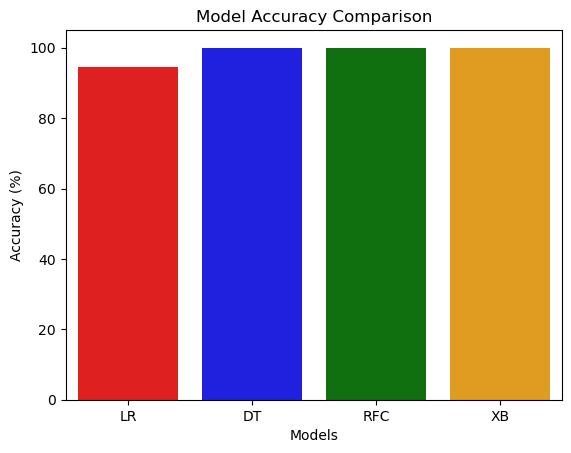

In [137]:
# Plotting a bar plot with different colors for each bar
sns.barplot(
    x=final_data1['Models'],
    y=final_data1['ACC'],
    palette=['red', 'blue', 'green', 'orange']  # Assign specific colors to each bar
)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()


#### 19. Confusion Matrix and ROC Curve after OverSampling

#### 19a) Logistic regression 

Confusion Matrix for Logistic Regression
[[53671  1402]
 [ 4583 50420]]
AUC for Normal Logistic Regression: 0.989


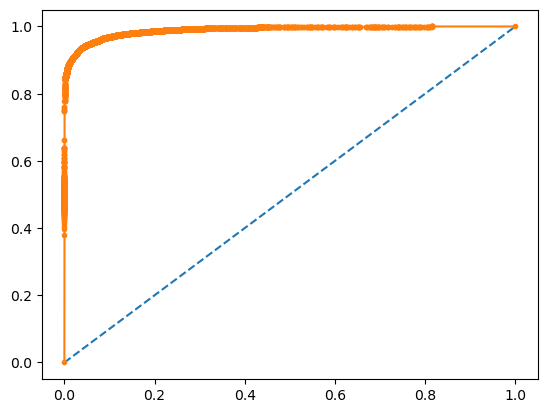

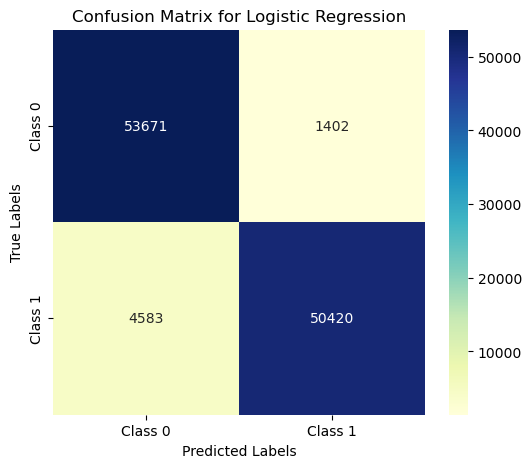

In [160]:
cfm1 = confusion_matrix(y_test, y_predic1)
print('Confusion Matrix for Logistic Regression')
print(cfm1)
probs = log.predict_proba(X_test)
probs = probs[:,1]
autc1 = roc_auc_score(y_test,probs)
print('AUC for Normal Logistic Regression: %.3f' % autc1)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cfm1, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 19b) Decision Tree Classifier

Confusion Matrix for Decision Tree Classifier
[[54942   131]
 [   54 54949]]
AUC for Decision Tree Classifier: 0.989


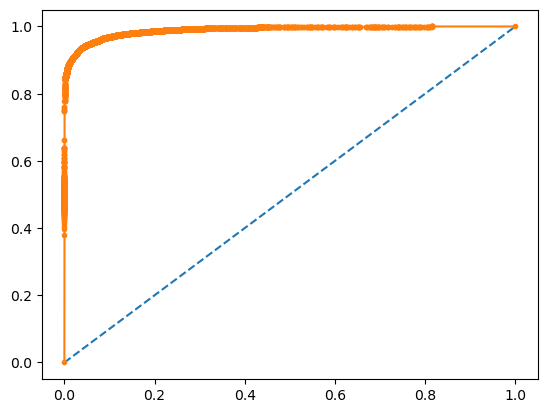

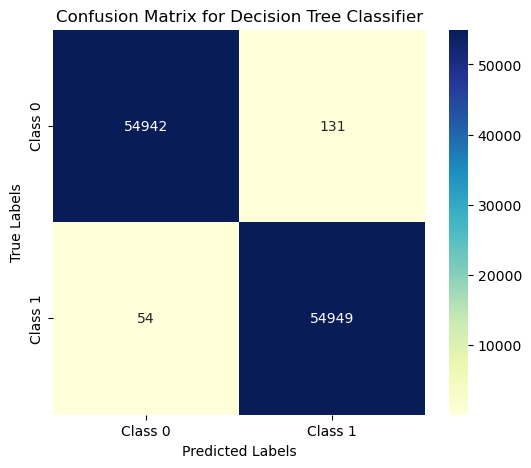

In [168]:
cfm2 = confusion_matrix(y_test, y_predic2)
print('Confusion Matrix for Decision Tree Classifier')
print(cfm2)
probs = log.predict_proba(X_test)
probs = probs[:,1]
autc2 = roc_auc_score(y_test,probs)
print('AUC for Decision Tree Classifier: %.3f' % autc2)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cfm2, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 19c) RandomForrest Classifier

Confusion Matrix for Random Forrest Classifier
[[55064     9]
 [    0 55003]]
AUC for Random Forrest Classifier: 0.989


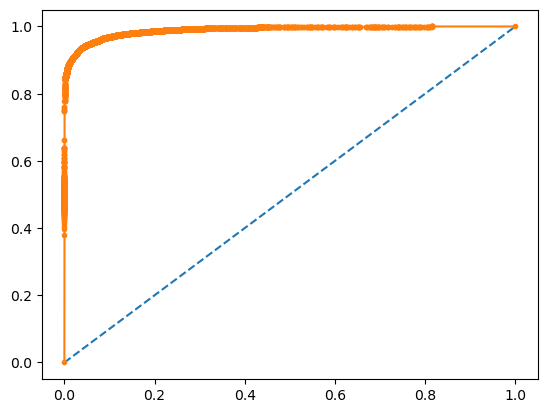

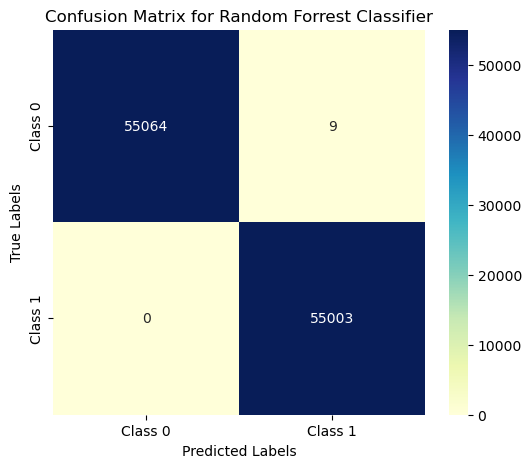

In [166]:
cfm3 = confusion_matrix(y_test, y_predic3)
print('Confusion Matrix for Random Forrest Classifier')
print(cfm3)
probs = log.predict_proba(X_test)
probs = probs[:,1]
autc3 = roc_auc_score(y_test,probs)
print('AUC for Random Forrest Classifier: %.3f' % autc3)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cfm3, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Random Forrest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 19d) XGBoost Classifier

Confusion Matrix for XGBoost Classifier
[[53671  1402]
 [ 4583 50420]]
AUC for XGBoost Classifier: 0.989


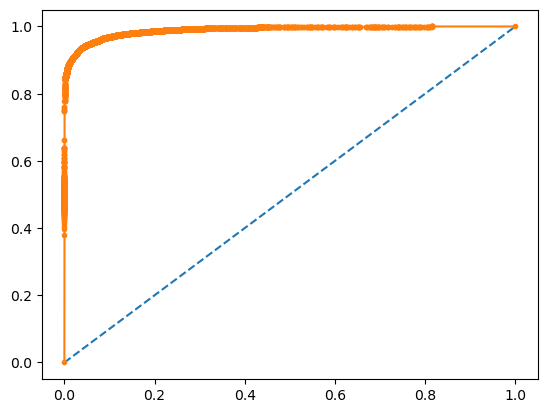

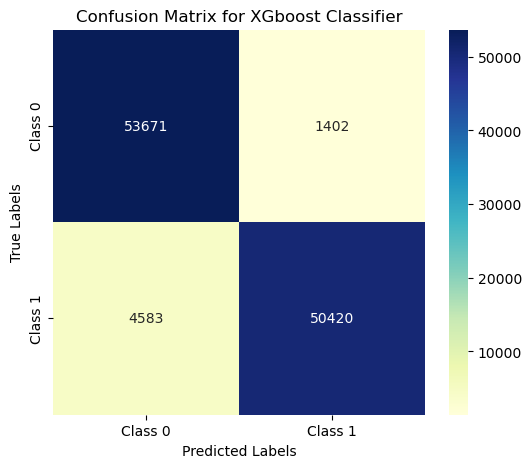

In [167]:
cfm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for XGBoost Classifier')
print(cfm4)
probs = log.predict_proba(X_test)
probs = probs[:,1]
autc4 = roc_auc_score(y_test,probs)
print('AUC for XGBoost Classifier: %.3f' % autc4)
fbr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fbr, tpr, marker='.')
plt.show()
# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cfm4, annot=True, cmap="YlGnBu", fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for XGboost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 20. Autoencoder

In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Autoencoder Model
autoencoder = keras.Sequential([
    # Encoder
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    # Bottleneck
    layers.Dense(16, activation='relu'),
    # Decoder
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(X_train_scaled.shape[1], activation='sigmoid')
])

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the Autoencoder
autoencoder.fit(
    X_train_scaled, X_train_scaled, 
    epochs=50, batch_size=32, 
    validation_data=(X_test_scaled, X_test_scaled),
    callbacks=[early_stopping]
)

# Reconstruction Error for Anomaly Detection
reconstructions = autoencoder.predict(X_test_scaled)
reconstruction_errors = tf.reduce_mean(tf.square(X_test_scaled - reconstructions), axis=1)

# Set an anomaly detection threshold
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies
anomalies = reconstruction_errors > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Epoch 1/50
13760/13760 [==============================] - 46s 3ms/step - loss: 8.7197e-04 - val_loss: 3.8826e-04
Epoch 2/50
13760/13760 [==============================] - 42s 3ms/step - loss: 2.9135e-04 - val_loss: 2.4919e-04
Epoch 3/50
13760/13760 [==============================] - 43s 3ms/step - loss: 2.2485e-04 - val_loss: 2.2372e-04
Epoch 4/50
13760/13760 [==============================] - 43s 3ms/step - loss: 1.8797e-04 - val_loss: 1.7954e-04
Epoch 5/50
13760/13760 [==============================] - 43s 3ms/step - loss: 1.7153e-04 - val_loss: 1.7010e-04
Epoch 6/50
13760/13760 [==============================] - 44s 3ms/step - loss: 1.5911e-04 - val_loss: 1.5258e-04
Epoch 7/50
13760/13760 [==============================] - 46s 3ms/step - loss: 1.4977e-04 - val_loss: 1.5164e-04
Epoch 8/50
13760/13760 [==============================] - 44s 3ms/step - loss: 1.4409e-04 - val_loss: 1.4795e-04
Epoch 9/50
13760/13760 [==============================] - 43s 3ms/step - loss: 1.3946e-04 - val_

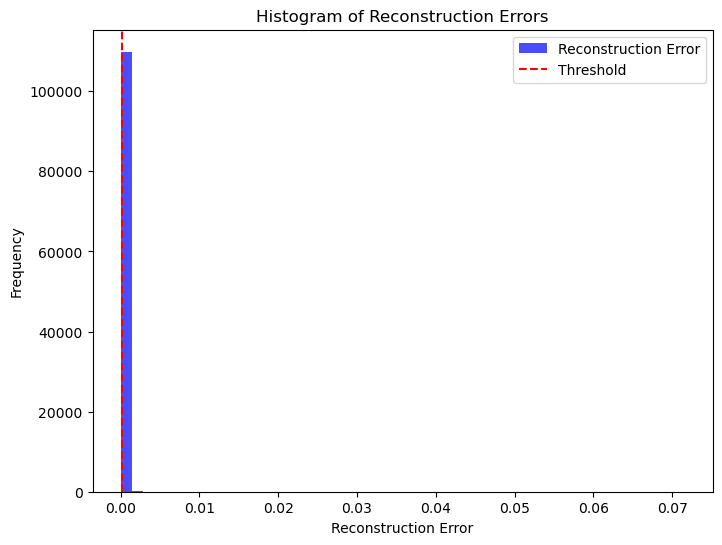

In [170]:
# Plot histogram of reconstruction errors
plt.figure(figsize=(8, 6))
plt.hist(reconstruction_errors.numpy(), bins=50, alpha=0.7, color='blue', label='Reconstruction Error')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.legend()
plt.show()

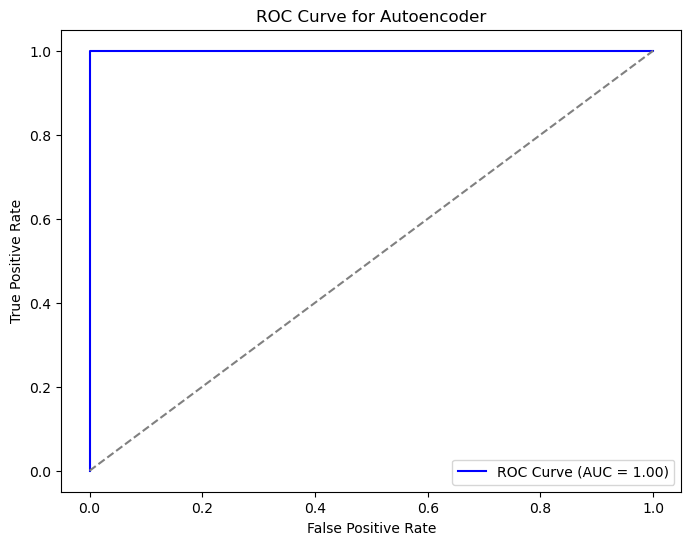

In [171]:
from sklearn.metrics import roc_curve, auc

# True labels (0 for normal, 1 for anomalies)
true_labels = np.array([0 if error <= threshold else 1 for error in reconstruction_errors])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, reconstruction_errors.numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Autoencoder')
plt.legend()
plt.show()

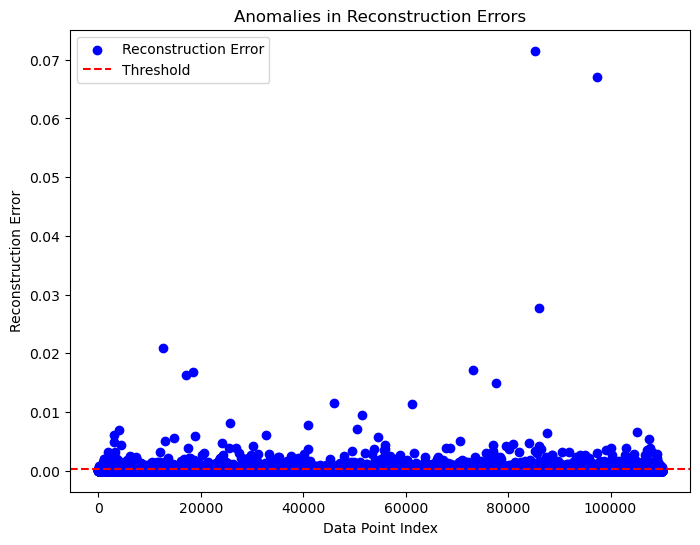

In [172]:
# Scatter plot for anomalies
plt.figure(figsize=(8, 6))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors.numpy(), color='blue', label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Data Point Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomalies in Reconstruction Errors')
plt.legend()
plt.show()

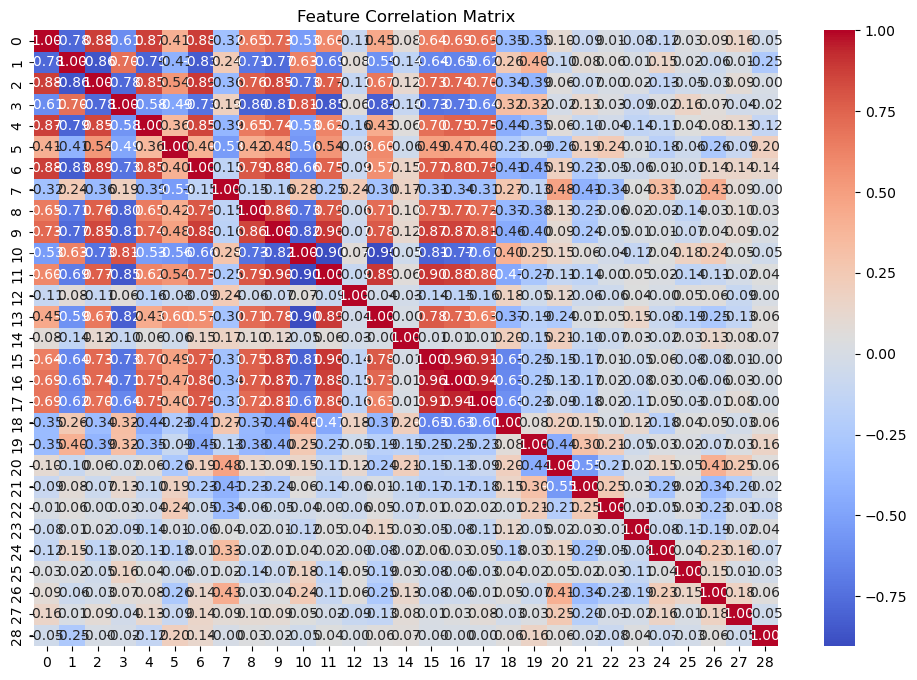

In [173]:
corr_matrix = pd.DataFrame(X_train_scaled).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()